In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import collections
import random

In [3]:
import datetime

In [4]:
import utils

In [5]:
import blocksci

In [6]:
chain = blocksci.Blockchain(utils.blocksci_config())

In [7]:
df_predictions = pd.read_csv(utils.latest_smart_prediction(), index_col=0)

/home/ubuntu/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
outcome = df_predictions["true_change"]

In [9]:
df_predictions_compressed = df_predictions.drop(columns=["power_of_ten_2", "power_of_ten_3", "power_of_ten_4", "power_of_ten_5", "power_of_ten_6", "power_of_ten_7", "two_hops", "true_change"])

In [10]:
df_predictions = df_predictions.drop(columns=["pow10", "two_hops", "true_change"])

In [11]:
len(df_predictions)

35257428

In [12]:
df_predictions.columns

Index(['optimal_change', 'optimal_change_with_fee', 'address_type',
       'power_of_ten_2', 'power_of_ten_3', 'power_of_ten_4', 'power_of_ten_5',
       'power_of_ten_6', 'power_of_ten_7', 'fp_inout_count', 'fp_output_count',
       'fp_zeroconf', 'fp_multisig', 'fp_p2pkh', 'fp_absolute_fee',
       'fp_relative_fee', 'fp_version', 'fp_locktime', 'fp_rbf', 'fp_segwit',
       'fp_possible_segwit', 'fp_ordered_inouts', 'fp_address_type', 'fp_p2sh',
       'fp_p2wsh', 'fp_p2wpkh'],
      dtype='object')

In [13]:
df_predictions_compressed.columns

Index(['optimal_change', 'optimal_change_with_fee', 'address_type', 'pow10',
       'fp_inout_count', 'fp_output_count', 'fp_zeroconf', 'fp_multisig',
       'fp_p2pkh', 'fp_absolute_fee', 'fp_relative_fee', 'fp_version',
       'fp_locktime', 'fp_rbf', 'fp_segwit', 'fp_possible_segwit',
       'fp_ordered_inouts', 'fp_address_type', 'fp_p2sh', 'fp_p2wsh',
       'fp_p2wpkh'],
      dtype='object')

35257428 change outputs that we could possibly determine.

In [14]:
df_predictions.ne(-1).any(1).sum()

34398846

In [15]:
df_predictions.eq(outcome, axis=0).any(1).sum()

33337309

In [18]:
FINGERPRINT_COLS = [x for x in df_predictions.columns if x[:3] == "fp_"]

In [19]:
normal_only = df_predictions.drop(columns=FINGERPRINT_COLS)

In [20]:
fp_only = df_predictions[FINGERPRINT_COLS]

In [21]:
normal_only.ne(-1).any(1).sum()

27493455

In [22]:
fp_only.ne(-1).any(1).sum()

32165523

### Plot bivariate distribution of correct / incorrect votes (compressed)

In [19]:
correct = df_predictions_compressed.eq(outcome, axis=0).sum(1)

In [20]:
incorrect = (df_predictions_compressed.ne(outcome, axis=0) & df_predictions_compressed.ne(-1, axis=0)).sum(1)

In [21]:
len(correct), len(incorrect)

(35257428, 35257428)

In [22]:
bivariate = pd.DataFrame({"correct": correct, "incorrect": incorrect})

In [23]:
bivariate

,correct,incorrect
36485,0,2
38619,4,0
44447,4,1
46689,2,3
47882,2,0
...,...,...
652608322,4,1
652608602,10,0
652608816,2,0
652608896,0,0


In [24]:
bivariate = bivariate.apply(pd.to_numeric, downcast='integer')

In [25]:
bivariate_vc = bivariate.value_counts().unstack()

In [26]:
bivariate_vc.T.sum()

correct
0     1920119.0
1     4303891.0
2     6081156.0
3     5428233.0
4     3865214.0
5     2540722.0
6     2148835.0
7     1967263.0
8     1871297.0
9     1870416.0
10    1456202.0
11     959223.0
12     526495.0
13     224755.0
14      75034.0
15      15806.0
16       2490.0
17        266.0
18         11.0
dtype: float64

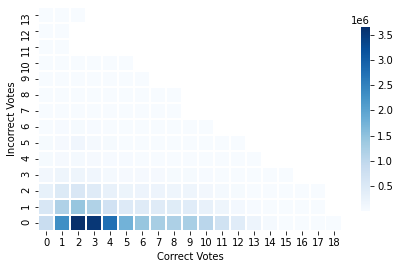

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(bivariate_vc.T, square=True, linewidths=.5, cmap="Blues", ax=ax, cbar_kws={"shrink":.75})
ax.invert_yaxis()
ax.set_xlabel("Correct Votes")
ax.set_ylabel("Incorrect Votes")
plt.tight_layout()

In [28]:
ax.get_figure().savefig("figures/votes-heuristics-compressed.pdf", format="pdf")

### Plot bivariate distribution of correct / incorrect votes (full)

In [29]:
correct = df_predictions.eq(outcome, axis=0).sum(1)

In [30]:
incorrect = (df_predictions.ne(outcome, axis=0) & df_predictions.ne(-1, axis=0)).sum(1)

In [31]:
len(correct), len(incorrect)

(35257428, 35257428)

In [32]:
bivariate = pd.DataFrame({"correct": correct, "incorrect": incorrect})

In [33]:
bivariate

,correct,incorrect
36485,0,2
38619,4,0
44447,4,1
46689,2,3
47882,2,0
...,...,...
652608322,4,1
652608602,13,0
652608816,2,0
652608896,0,0


In [34]:
bivariate = bivariate.apply(pd.to_numeric, downcast='integer')

In [35]:
bivariate_vc = bivariate.value_counts().unstack()

In [36]:
bivariate_vc.T.sum()

correct
0     1920119.0
1     2570472.0
2     3849921.0
3     3284256.0
4     3158485.0
5     3021973.0
6     3295312.0
7     3051212.0
8     2840063.0
9     2378881.0
10    1799699.0
11    1332337.0
12     958659.0
13     661906.0
14     473702.0
15     320757.0
16     189238.0
17      95445.0
18      40055.0
19      12245.0
20       2310.0
21        349.0
22         31.0
23          1.0
dtype: float64

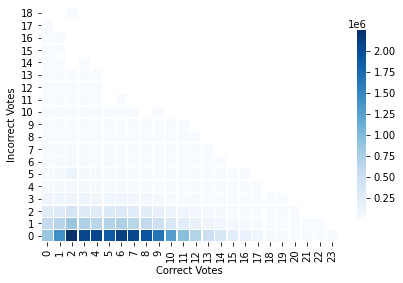

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(bivariate_vc.T, square=True, linewidths=.5, cmap="Blues", ax=ax, cbar_kws={"shrink":.8})
ax.invert_yaxis()
ax.set_xlabel("Correct Votes")
ax.set_ylabel("Incorrect Votes")
plt.tight_layout()

In [38]:
ax.get_figure().savefig("figures/votes-heuristics.pdf", format="pdf")

### Over time

In [23]:
normal_only = df_predictions.drop(columns=FINGERPRINT_COLS)

In [24]:
fp_only = df_predictions[FINGERPRINT_COLS]

In [25]:
len(normal_only), len(fp_only)

(35257428, 35257428)

In [26]:
gt = blocksci.GroundTruth(utils.latest_groundtruth(), chain)

In [27]:
index = gt.transactions().block.time

In [28]:
normal_only.index = index
fp_only.index = index

In [29]:
outcome.index = index

In [30]:
correct_normal = normal_only.eq(outcome, axis=0).sum(1).resample("1 M").mean()

In [31]:
incorrect_normal = (normal_only.ne(outcome, axis=0) & normal_only.ne(-1, axis=0)).sum(1).resample("1 M").mean()

In [32]:
correct_fp = fp_only.eq(outcome, axis=0).sum(1).resample("1 M").mean()

In [33]:
incorrect_fp = (fp_only.ne(outcome, axis=0) & fp_only.ne(-1, axis=0)).sum(1).resample("1 M").mean()

In [34]:
df_comparison = pd.DataFrame({"Universal: Correct": correct_normal, "Universal: Incorrect": incorrect_normal, "Fingerprint: Correct": correct_fp, "Fingerprint: Incorrect": incorrect_fp})

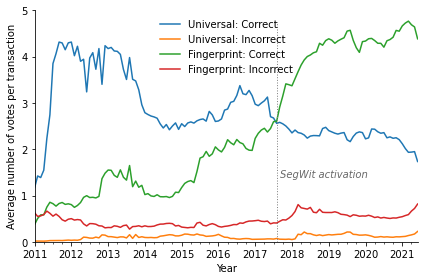

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
df_comparison.plot(xlabel="Year", ylabel="Average number of votes per transaction", ax=ax)
ax.legend(frameon=False)
ax.set_ylim(0)
ax.set_xlim(datetime.datetime(2011, 1, 1))

plt.axvline(datetime.datetime(2017, 8, 24), color = "gray", linestyle = ":", linewidth = 1, ymax = 0.95)
plt.text(datetime.datetime(2017, 9, 30), 1.4, 'SegWit activation', fontsize = "medium", fontstyle = "italic", color = "dimgray")

sns.despine()
plt.tight_layout()
plt.savefig("figures/heuristics-count.pdf")

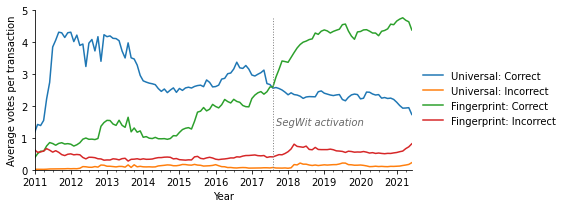

In [43]:
fig, ax = plt.subplots(figsize=(8,3))
df_comparison.plot(xlabel="Year", ylabel="Average votes per transaction", ax=ax)
ax.set_ylim(0)
ax.set_xlim(datetime.datetime(2011, 1, 1))

plt.axvline(datetime.datetime(2017, 8, 24), color = "gray", linestyle = ":", linewidth = 1, ymax = 0.95)
plt.text(datetime.datetime(2017, 9, 30), 1.4, 'SegWit activation', fontsize = "medium", fontstyle = "italic", color = "dimgray")

ax.legend(frameon=False, loc = (1.02, 0.25))

sns.despine()
plt.tight_layout()
plt.savefig("figures/heuristics-count-fc.pdf")

### Over time (compressed)

In [55]:
normal_only = df_predictions_compressed.drop(columns=FINGERPRINT_COLS)

In [56]:
fp_only = df_predictions_compressed[FINGERPRINT_COLS]

In [57]:
len(normal_only), len(fp_only)

(35257428, 35257428)

In [58]:
index = gt.transactions().block.time

In [59]:
normal_only.index = index
fp_only.index = index

In [60]:
outcome.index = index

In [61]:
correct_normal = normal_only.eq(outcome, axis=0).sum(1).resample("1 M").mean()

In [62]:
incorrect_normal = (normal_only.ne(outcome, axis=0) & normal_only.ne(-1, axis=0)).sum(1).resample("1 M").mean()

In [63]:
correct_fp = fp_only.eq(outcome, axis=0).sum(1).resample("1 M").mean()

In [64]:
incorrect_fp = (fp_only.ne(outcome, axis=0) & fp_only.ne(-1, axis=0)).sum(1).resample("1 M").mean()

In [65]:
df_comparison = pd.DataFrame({"Universal: Correct": correct_normal, "Universal: Incorrect": incorrect_normal, "Fingerprint: Correct": correct_fp, "Fingerprint: Incorrect": incorrect_fp})

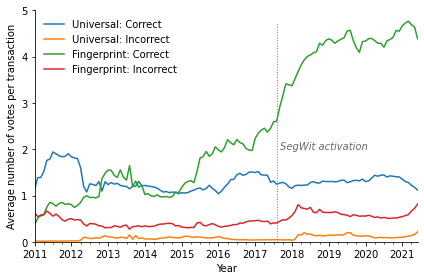

In [66]:
fig, ax = plt.subplots(figsize=(6,4))
df_comparison.plot(xlabel="Year", ylabel="Average number of votes per transaction", ax=ax)
ax.legend(frameon=False)
ax.set_ylim(0)
ax.set_xlim(datetime.datetime(2011, 1, 1))

plt.axvline(datetime.datetime(2017, 8, 24), color = "gray", linestyle = ":", linewidth = 1, ymax = 0.95)
plt.text(datetime.datetime(2017, 9, 30), 2, 'SegWit activation', fontsize = "medium", fontstyle = "italic", color = "dimgray")

sns.despine()
plt.tight_layout()

In [67]:
ax.get_figure().savefig("figures/heuristics-count-compressed.pdf", format="pdf")